
# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots


Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [1]:
import pandas as pd
import numpy as np

df_can = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

Let's take a look at the first five items in our dataset.


In [2]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


<ipython-input-2-5b807af711f8>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [3]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


# Pie Charts <a id="6"></a>


<div style="border:1px solid green; padding: 10px">
<font color='green' style="font-weight:bold">A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion</font></div>


Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


<img src="images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [4]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Northern America                  7074   7705   6469   6790  ...    8394   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   

                                   2011    2012    2013    Total  
Continent                                                         
Africa                            35441   38083   38543   618948  
Asia                             146894  152218  155075  3317794  
Europe                            26778   29177   28691  1410947  
Latin America and the Caribbean   27856   27173   24950   765148  
Northern America                   7677    7892    8503   241142  

[5 rows x 35 columns]

Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


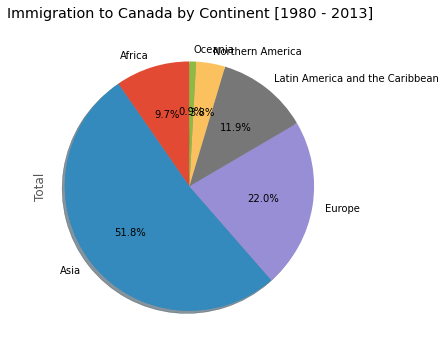

In [5]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


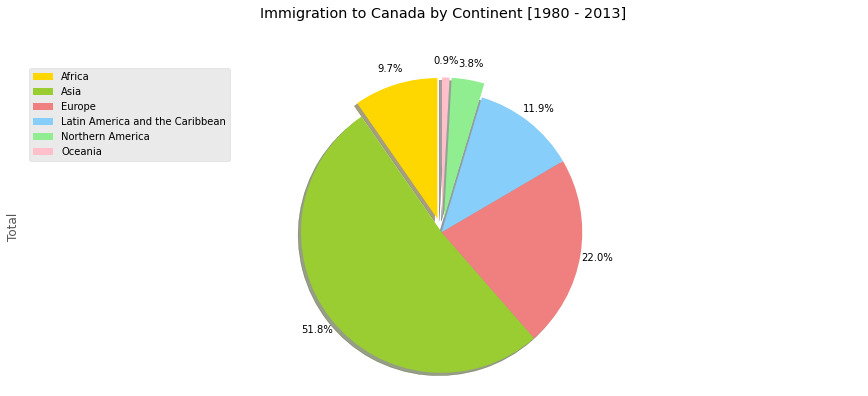

In [6]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

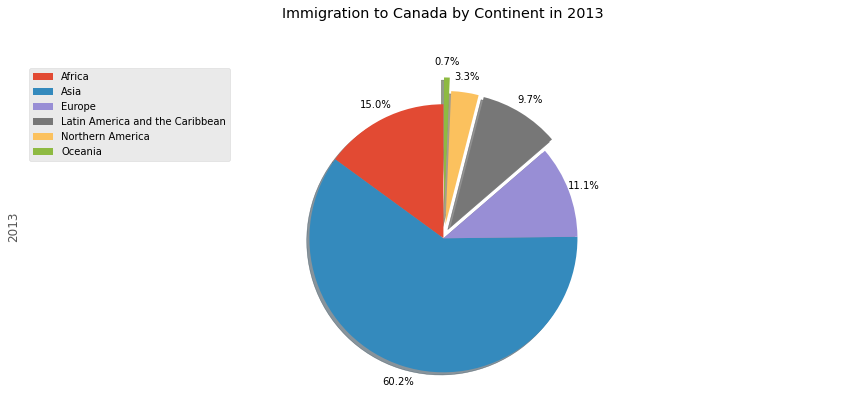

In [7]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plots <a id="8"></a>


<div style="border:1px solid green; padding: 10px">
<font color='green' style="font-weight:bold">A box plot is a way of statistically representing the distribution of the data</font></div>

It has five main dimensions:
* Minimum: The smallest number in the dataset excluding the outliers.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: The largest number in the dataset excluding the outliers.

<img src="images/boxPlot.png"/>


Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


In [8]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country  Japan
1980       701
1981       756
1982       598
1983       309
1984       246

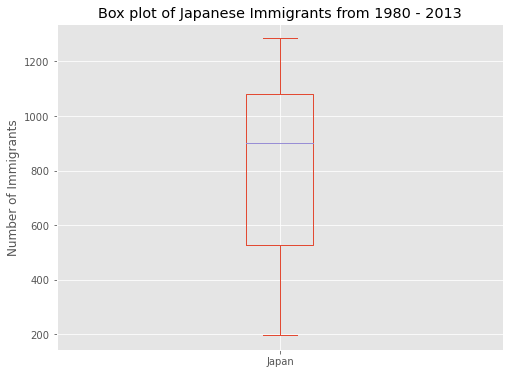

In [9]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [10]:
df_japan.describe()

Country        Japan
count      34.000000
mean      814.911765
std       337.219771
min       198.000000
25%       529.000000
50%       902.000000
75%      1079.000000
max      1284.000000

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.


In [11]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country  China  India
1980      5123   8880
1981      6682   8670
1982      3308   8147
1983      1863   7338
1984      1527   5704

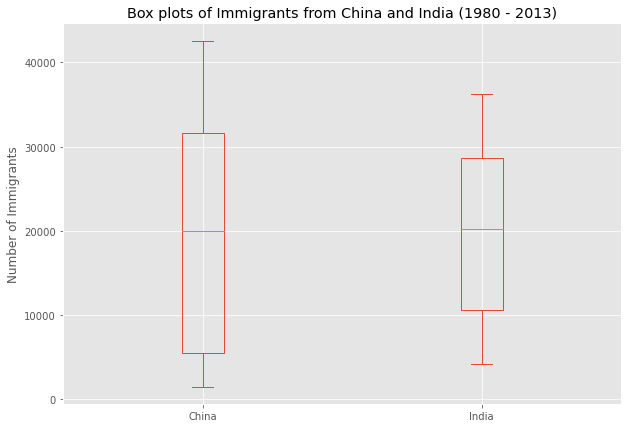

In [12]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.


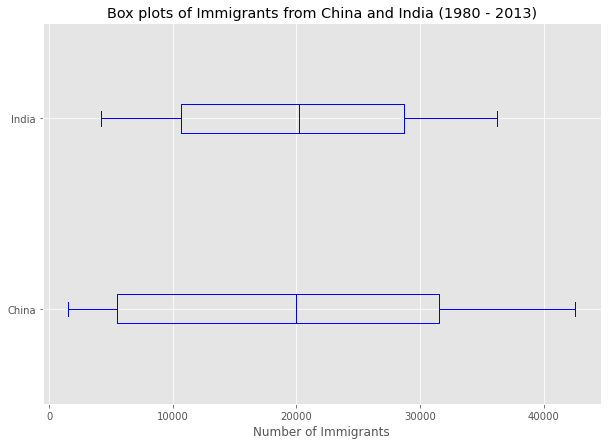

In [13]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Subplots are way to plot multiple plots within the same figure. 
We can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. 

With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="images/Mod3Fig5Subplots_V2.png" width=500 align="center">


We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


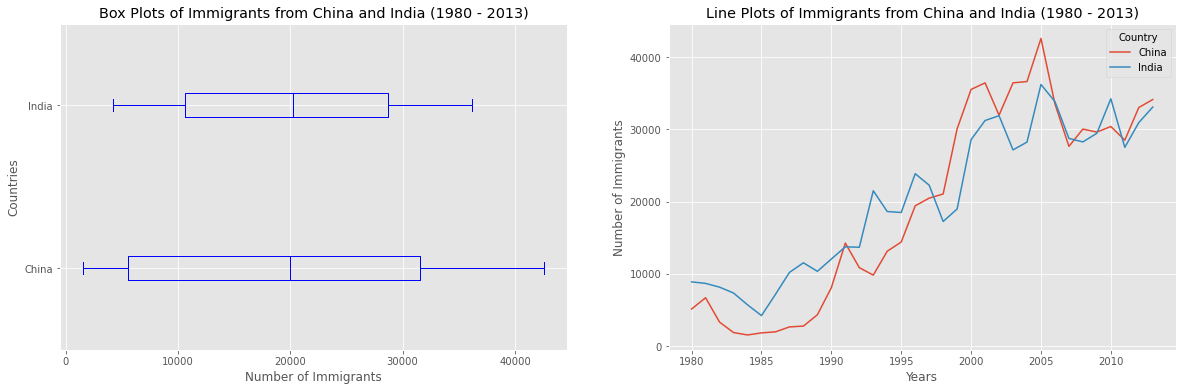

In [14]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

# Scatter Plots <a id="10"></a>


<div style="border:1px solid green; padding: 10px">
<font color='green' style="font-weight:bold">A scatter plot (2D) is a useful method of comparing variables against each other. 
    
Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. 
    
While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. 
    
    
The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.
</font></div>

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [15]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

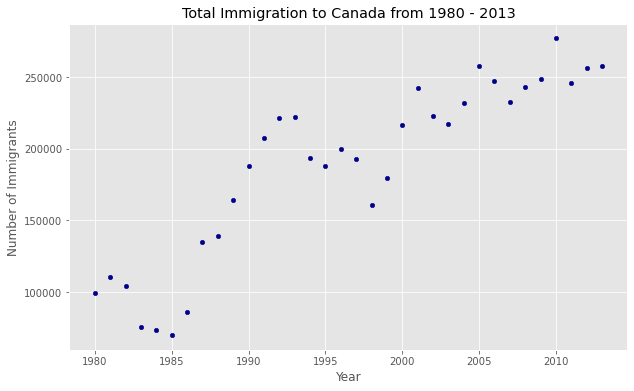

In [16]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [17]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the `scatter plot`.


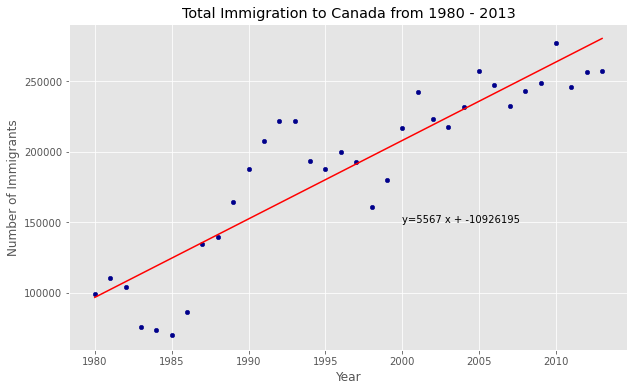

In [18]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()


**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


In [19]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()


year  total
0  1980    669
1  1981    678
2  1982    627
3  1983    333
4  1984    252

**Step 2**: Generate the scatter plot by plotting the total versus year in **df_total**.


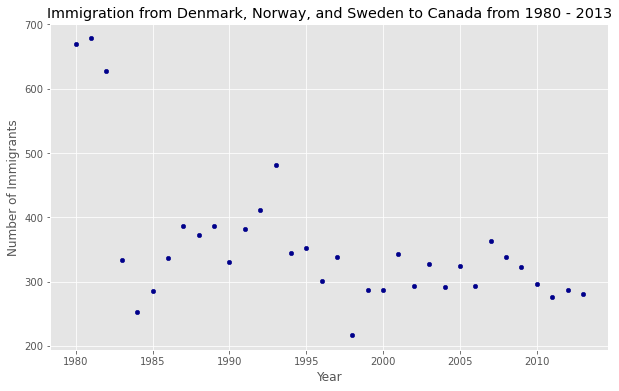

In [20]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# show plot
plt.show()



# Bubble Plots <a id="12"></a>


<div style="border:1px solid green; padding: 10px">
<font color='green' style="font-weight:bold">A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). 
    
The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. 
    
In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point. </font></div>


**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


**Step 1**: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and include it in the dataframe.


In [21]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country  Year  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
0        1980           16        1       80               0        0       1   
1        1981           39        0       67               1        0       3   
2        1982           39        0       71               0        0       6   
3        1983           47        0       69               0        0       6   
4        1984           71        0       63               0        0       4   

Country  Antigua and Barbuda  Argentina  Armenia  ...  \
0                          0        368        0  ...   
1                          0        426        0  ...   
2                          0        626        0  ...   
3                          0        241        0  ...   
4                         42        237        0  ...   

Country  United States of America  Uruguay  Uzbekistan  Vanuatu  \
0                            9378      128           0        0   
1                           10030      132           0        0   
2                            9074      146           0        0   
3                            7100      105           0        0   
4                            6661       90           0        0   

Country  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  Yemen  \
0                                       103      1191               0      1   
1                                       117      1829               0      2   
2                                       174      2162               0      1   
3                                       124      3404               0      6   
4                                       142      7583               0      0   

Country  Zambia  Zimbabwe  
0            11        72  
1            17       114  
2            11       102  
3             7        44  
4            16        32  

[5 rows x 196 columns]

**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2022-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [22]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Step 3**: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


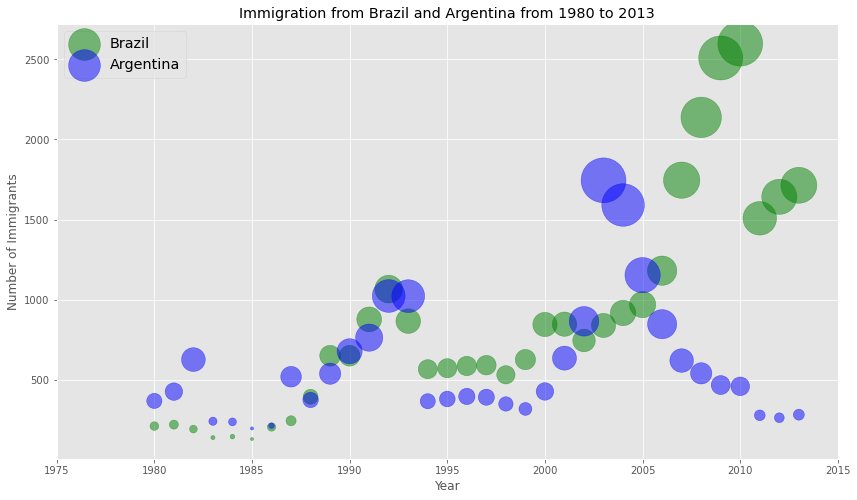

In [23]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.


Step 1: Normalize the data pertaining to China and India.


In [24]:
# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())



Step 2: Generate the bubble plots.


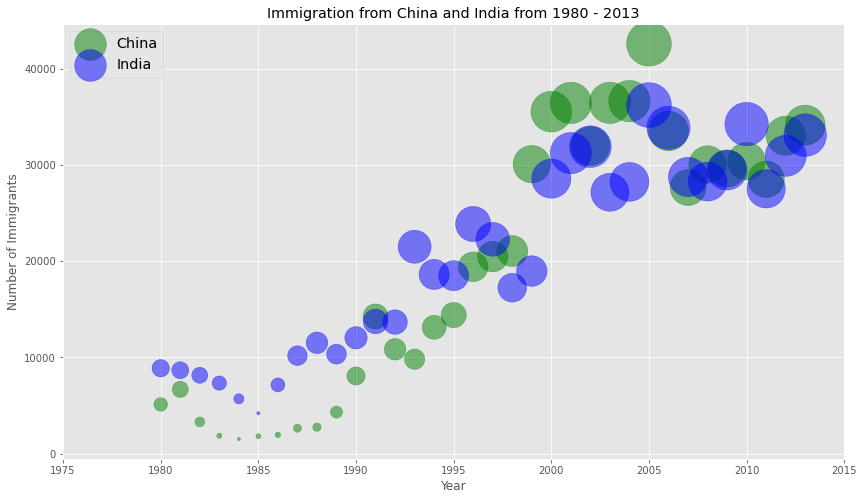

In [25]:
# China
ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

# India
ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')


